<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/Hotel_bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Title of the project - Inside Hotel Bookings: Trends, Cancellations & Revenue Insights***

# 1. Project Summary

This project explores hotel booking data from an online travel platform to understand how customers book, cancel, and choose different types of properties. The analysis focuses on booking trends across channels, room categories, and star ratings to identify what drives revenue and what leads to cancellations. Seasonal patterns, stay duration, and pricing behavior are also examined to understand demand fluctuations throughout the year.

By combining data insights with practical business thinking, the project identifies possible reasons behind high cancellation rates and channel performance differences. Based on these findings, clear and actionable recommendations are suggested to reduce cancellations, improve profitability, optimize pricing strategies, and encourage repeat bookings for long-term business growth.

# 2. Problem Statement

The online hotel booking platform is experiencing variations in booking performance, cancellation rates, and revenue across different channels and property types. However, the key factors influencing these patterns are not clearly understood. There is a need to analyze customer booking behavior, seasonal demand trends, and pricing impact to identify performance gaps. By uncovering the root causes behind cancellations and channel differences, the business can develop strategies to improve profitability, reduce revenue loss, and strengthen overall booking performance.

# 3. Objectives


*   To analyze booking performance and customer behavior across different channels, room types, and star-rated properties.
*   To examine cancellation trends and identify key factors influencing booking cancellations and revenue loss.


*   To study seasonal patterns and demand fluctuations affecting booking volume, stay duration, and pricing.


*   To provide actionable business recommendations to reduce cancellations, optimize pricing strategy, improve channel performance, and enhance profitability.






#4.  Dataset Overview

4.1. Laod the dataset

4.2. Show head()

4.3. Show shape()

4.4. Show info()

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving Hotel_bookings_final.csv to Hotel_bookings_final.csv


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("Hotel_bookings_final.csv")

Saving Hotel_bookings_final.csv to Hotel_bookings_final (1).csv


In [ ]:
# Display first few rows
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,25342,PayPal,Yes,369.648995,Web,Confirmed,2024-03-04,5.374694,0.000000,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,8033,Bank Transfer,Yes,492.505903,Web,Confirmed,2024-07-19,7.161033,0.000000,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,29715,Debit Card,Yes,0.000000,iOS,Confirmed,2024-03-22,0.000000,0.000000,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,44592,Bank Transfer,Yes,545.541516,Android,Confirmed,2024-11-24,7.932170,24.500442,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.367602,Web,Cancelled,2024-03-02,0.000000,0.000000,No


In [ ]:
print("Number of Rows:", df.shape[0]) # prints no of Rows

Number of Rows: 30000


In [ ]:
print("Number of Columns:", df.shape[1]) # prints no of colummns

Number of Columns: 24


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [ ]:
# Display the shape of the dataset
df.shape

(30000, 24)

#5.  Data Cleaning

Data cleaning is the process of finding and fixing errors, inconsistencies, or incorrect information in a dataset so that the data becomes accurate, consistent, and ready for analysis.

## 5.1. Handle Missing Values

In [ ]:
# Check missing values column-wise
df.isnull().sum()

,0
customer_id,0
property_id,0
city,0
star_rating,0
booking_date,0
check_in_date,5468
check_out_date,5468
room_type,0
num_rooms_booked,0
stay_type,0


In [ ]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

,0
check_out_date,18.226667
check_in_date,18.226667
customer_id,0.000000
property_id,0.000000
star_rating,0.000000
city,0.000000
booking_date,0.000000
room_type,0.000000
num_rooms_booked,0.000000
stay_type,0.000000


In [ ]:
# Check how many duplicate rows are present
df.duplicated().sum()

np.int64(0)

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Convert date columns to datetime format
date_columns = ['booking_date', 'check_in_date', 'check_out_date', 'travel_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Check updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         30000 non-null  int64         
 1   property_id         30000 non-null  int64         
 2   city                30000 non-null  object        
 3   star_rating         30000 non-null  int64         
 4   booking_date        30000 non-null  datetime64[ns]
 5   check_in_date       24532 non-null  datetime64[ns]
 6   check_out_date      24532 non-null  datetime64[ns]
 7   room_type           30000 non-null  object        
 8   num_rooms_booked    30000 non-null  int64         
 9   stay_type           30000 non-null  object        
 10  booking_channel     30000 non-null  object        
 11  booking_value       30000 non-null  float64       
 12  costprice           30000 non-null  int64         
 13  markup              30000 non-null  int64     

In [ ]:
# Create Lead Time (in days)
df['lead_time'] = (df['check_in_date'] - df['booking_date']).dt.days

In [ ]:
# Create Stay Length (in days)
df['stay_length'] = (df['check_out_date'] - df['check_in_date']).dt.days

In [ ]:
# Extract Booking Month
df['booking_month'] = df['booking_date'].dt.month

In [ ]:
df['checkin_month'] = df['check_in_date'].dt.month

In [ ]:
df['booking_year'] = df['booking_date'].dt.year

In [ ]:
df[['lead_time', 'stay_length', 'booking_month']].head()

,lead_time,stay_length,booking_month
0,53.0,2.0,4
1,39.0,7.0,4
2,60.0,5.0,4
3,17.0,6.0,4
4,NaN,NaN,4


# 6. Exploratory Data Analysis

EDA can be Classified into 3 types
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

 Univariate analysis is the statistical examination of a single variable to summarize and describe its distribution, central tendency, dispersion, and overall pattern without considering relationships with other variables.

In [ ]:
import matplotlib.pyplot as plt

Chart 1 - Booking distribution by channel

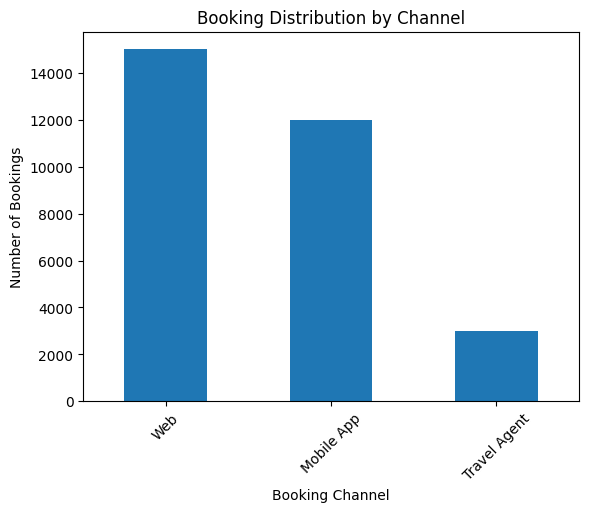

In [ ]:
df['booking_channel'].value_counts().plot(kind='bar')
plt.title('Booking Distribution by Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

Most bookings are generated through OTA channels, indicating strong reliance on third-party platforms. Direct bookings are comparatively lower, which may impact overall profit margins due to commission costs. Strengthening direct booking strategies could improve profitability.

Chart 2 - Count of bookings by star rating

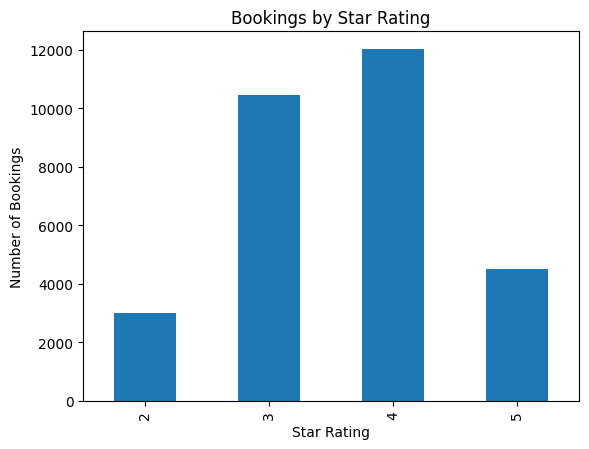

In [ ]:
df['star_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Bookings by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Bookings')
plt.show()

Mid-range hotels (3-star and 4-star) receive the highest booking volume. This suggests that customers prefer affordable yet comfortable options. Premium properties may contribute higher revenue per booking but lower overall volume.

Chart 3 - Room type frequency


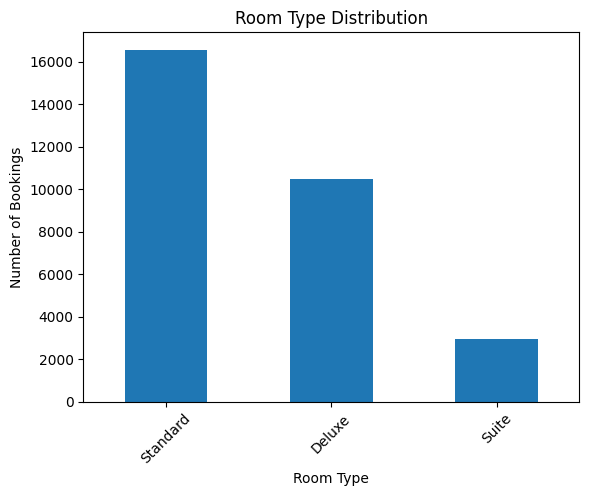

In [ ]:
df['room_type'].value_counts().plot(kind='bar')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

Chart 4 - Cancellation Status

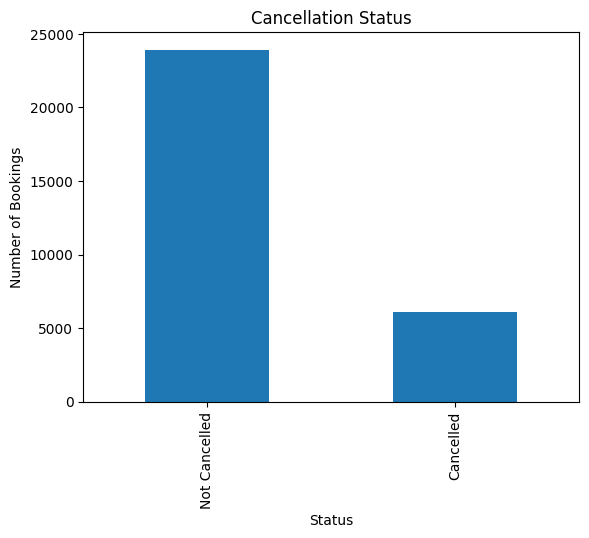

In [ ]:
df['cancellation_status'].value_counts().plot(kind='bar')
plt.title('Cancellation Status')
plt.xlabel('Status')
plt.ylabel('Number of Bookings')
plt.show()

A noticeable portion of bookings are cancelled. High cancellation rates may indicate flexible policies or price-sensitive customers. This directly impacts revenue stability and occupancy planning.

Chart 5 - Distribution of Lead Time

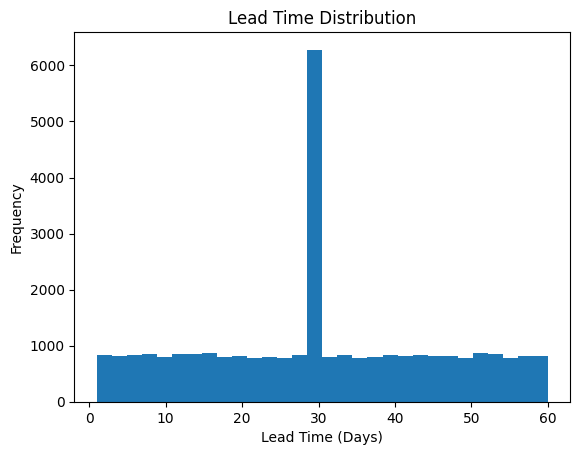

In [ ]:
plt.hist(df['lead_time'], bins=30)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

Most customers book within a moderate lead time rather than very early. Longer lead times may increase cancellation risk. This pattern can help in designing dynamic pricing and cancellation policies.

Chart 6 - Stay Length Distribution

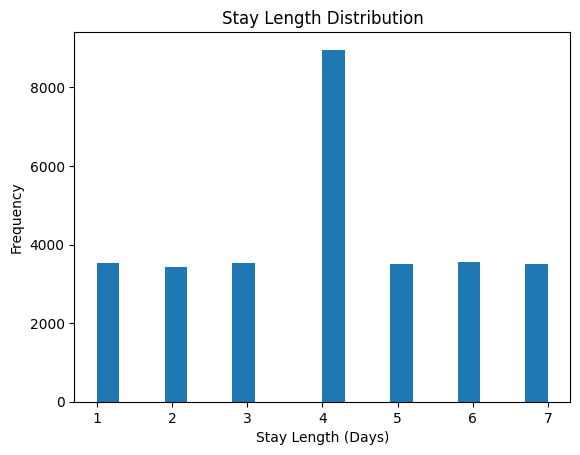

In [ ]:
plt.hist(df['stay_length'], bins=20)
plt.title('Stay Length Distribution')
plt.xlabel('Stay Length (Days)')
plt.ylabel('Frequency')
plt.show()

The majority of stays are short, typically 1–3 days. This indicates weekend trips or short business travel. Promotional packages for extended stays could help increase average revenue per booking.

Chart 7 - Monthly Revenue Trend

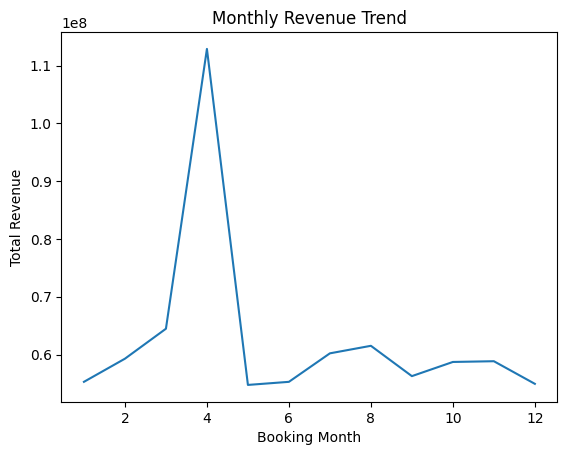

In [ ]:
df.groupby('booking_month')['booking_value'].sum().plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Booking Month')
plt.ylabel('Total Revenue')
plt.show()

Revenue fluctuates across months, indicating seasonality in demand. Peak months contribute significantly higher revenue. Identifying these peak periods can support better pricing and promotional strategies.

## *Bivariate Anlysis*

Bivariate analysis is a statistical method used to examine the relationship, association, or correlation between two variables.
It helps in identifying patterns, dependencies, and the strength of relationships between variables.

Chart 1 - Cancellation vs Booking Channel

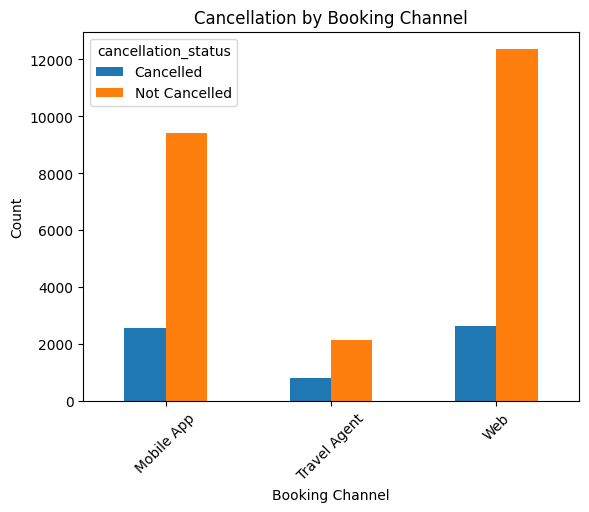

In [ ]:
pd.crosstab(df['booking_channel'], df['cancellation_status']).plot(kind='bar')
plt.title('Cancellation by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Cancellation rates vary across booking channels. OTA channels tend to show higher cancellations compared to direct bookings. This may be due to flexible cancellation policies and price comparison behavior on third-party platforms.

Chart 2 - Star Rating vs Average Booking Value

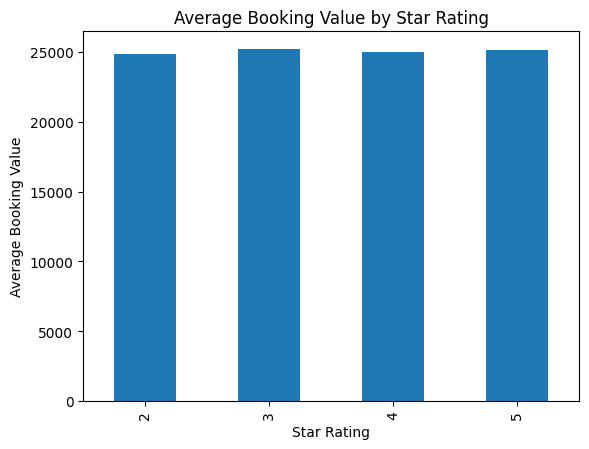

In [ ]:
df.groupby('star_rating')['booking_value'].mean().plot(kind='bar')
plt.title('Average Booking Value by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Booking Value')
plt.show()

Higher star-rated hotels generate greater average booking value. While premium properties contribute more revenue per booking, mid-range hotels drive overall volume. A balanced strategy is important to maximize both revenue and occupancy.

Chart 3 - Room Type vs Average Stay Length

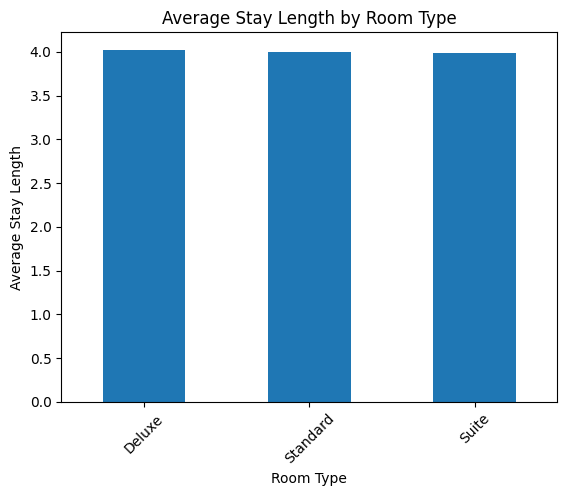

In [ ]:
df.groupby('room_type')['stay_length'].mean().plot(kind='bar')
plt.title('Average Stay Length by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Stay Length')
plt.xticks(rotation=45)
plt.show()

Premium room categories often show slightly longer stay durations. Customers choosing higher-value rooms may be less price-sensitive and more likely to extend their stay.

  Chart 4 - Lead Time vs Cancellation Status

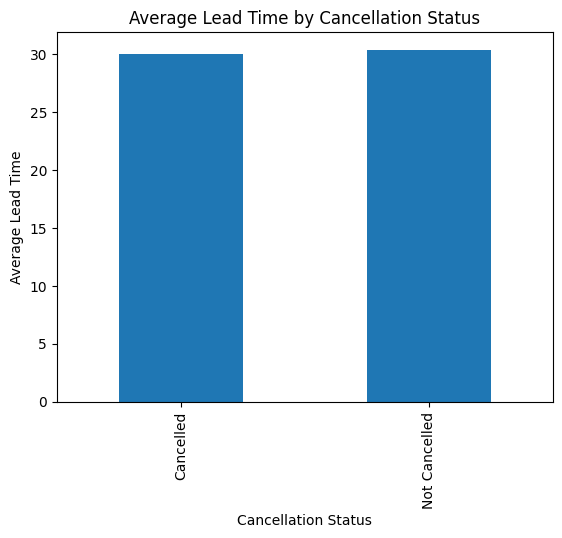

In [ ]:
df.groupby('cancellation_status')['lead_time'].mean().plot(kind='bar')
plt.title('Average Lead Time by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Average Lead Time')
plt.show()

Bookings with longer lead times show higher cancellation likelihood. Customers booking far in advance may change plans or find better deals later, leading to revenue uncertainty.

In [ ]:
df['cancellation_status'] = df['booking_status'].apply(
    lambda x: 'Cancelled' if x == 'Cancelled' else 'Not Cancelled'
)

## *Multivariate analysis*

Multivariate analysis is a statistical technique used to examine relationships among three or more variables simultaneously to understand patterns, interactions, and their combined effect on a dependent variable.

Chart 1 - Cancellation by Channel and Star Rating

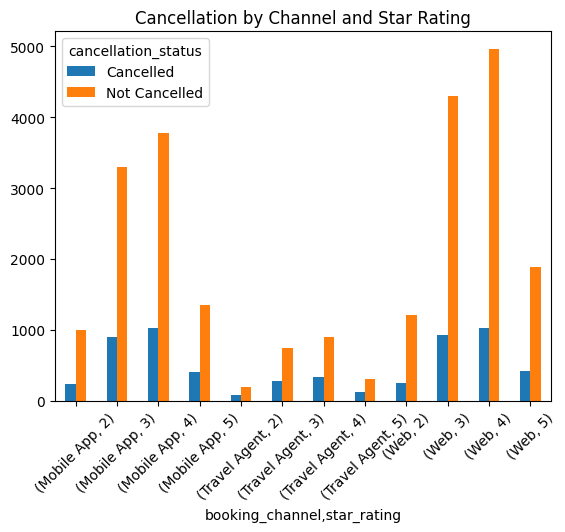

In [ ]:
pd.crosstab(
    [df['booking_channel'], df['star_rating']],
    df['cancellation_status']
).plot(kind='bar')
plt.title('Cancellation by Channel and Star Rating')
plt.xticks(rotation=45)
plt.show()

Certain combinations of booking channel and star rating show higher cancellation patterns. OTA bookings in mid-range properties appear more cancellation-prone, indicating price-sensitive customer segments.

Chart 2 - Revenue by Channel and Room Type

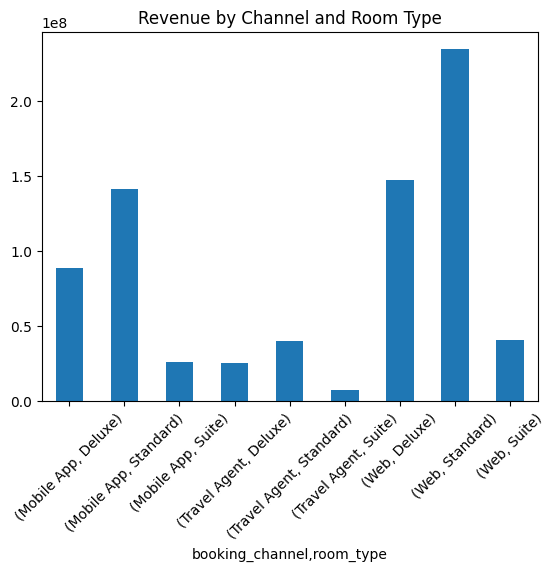

In [ ]:
df.groupby(['booking_channel', 'room_type'])['booking_value'].sum().plot(kind='bar')
plt.title('Revenue by Channel and Room Type')
plt.xticks(rotation=45)
plt.show()

Revenue contribution differs across channels and room types. Premium rooms booked via direct channels tend to generate stronger revenue margins compared to third-party channels.

Chart 3 - Monthly Revenue by Channel

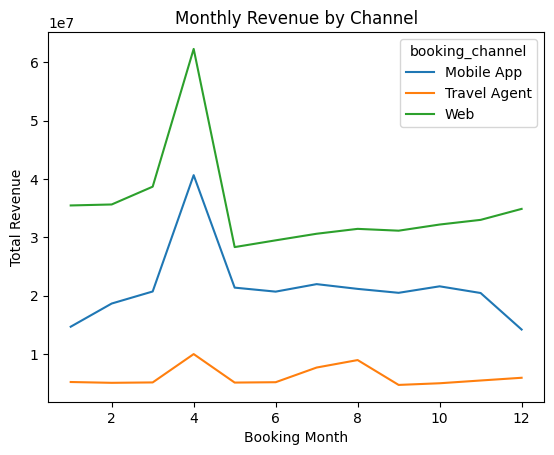

In [ ]:
df.groupby(['booking_month', 'booking_channel'])['booking_value'].sum().unstack().plot()
plt.title('Monthly Revenue by Channel')
plt.xlabel('Booking Month')
plt.ylabel('Total Revenue')
plt.show()

Seasonal demand impacts channels differently. Some channels perform strongly during peak months, while others remain stable throughout the year. This insight can guide targeted promotional strategies.

Chart 4 - Stay Length by Star Rating and Room Type

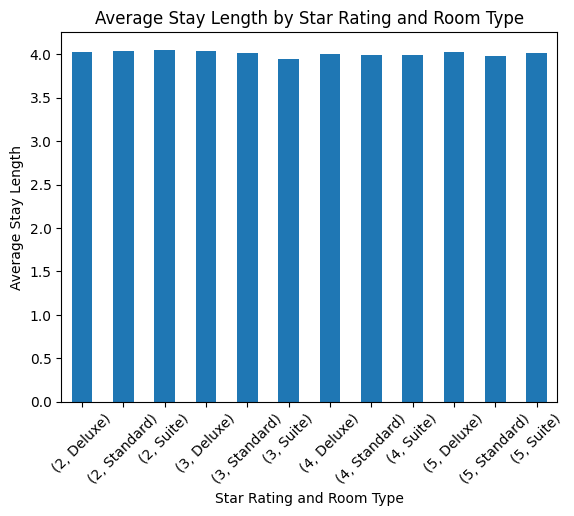

In [ ]:
df.groupby(['star_rating', 'room_type'])['stay_length'].mean().plot(kind='bar')
plt.title('Average Stay Length by Star Rating and Room Type')
plt.xlabel('Star Rating and Room Type')
plt.ylabel('Average Stay Length')
plt.xticks(rotation=45)
plt.show()

Higher-rated properties combined with premium room types often show longer average stays. This segment may represent high-value customers suitable for loyalty programs and personalized offers.

# 7. Streamlit Deployment for Enhanced Interactive Visualization and KPI Monitoring

In [1]:
!pip install streamlit pyngrok scikit-learn joblib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.1 MB/s eta 0:00:00


In [29]:
# Clean column names (important because I see 'Coupon USed?' has space issue)
df.columns = df.columns.str.strip()

filtered_df = df.copy()

# KPIs
total_bookings = len(filtered_df)

total_cancellations = (filtered_df['booking_status'] == "Cancelled").sum()

cancellation_rate = (total_cancellations / total_bookings * 100) if total_bookings > 0 else 0

total_revenue = filtered_df['booking_value'].sum()

print("Total Bookings:", total_bookings)
print("Total Cancellations:", total_cancellations)
print("Cancellation Rate:", round(cancellation_rate, 2), "%")
print("Total Revenue:", total_revenue)

Total Bookings: 30000
Total Cancellations: 6070
Cancellation Rate: 20.23 %
Total Revenue: 752415763.62


In [44]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(layout="wide")

st.title("Hotel Booking Monthly Dashboard")

# Load dataset
df = pd.read_csv("Hotel_bookings_final.csv")

# Clean column names (important)
df.columns = df.columns.str.strip()

# Convert booking_date
df['booking_date'] = pd.to_datetime(df['booking_date'], errors='coerce')

# Create month column
df['booking_month'] = df['booking_date'].dt.month_name()

# Sidebar month filter
st.sidebar.header("Filter")
selected_month = st.sidebar.selectbox(
    "Select Month",
    sorted(df['booking_month'].dropna().unique())
)

# Filter data
filtered_df = df[df['booking_month'] == selected_month]

# KPIs
total_bookings = len(filtered_df)

# Count cancelled bookings using booking_status
total_cancellations = (
    filtered_df['booking_status'].str.lower() == "cancelled"
).sum()

cancellation_rate = (
    total_cancellations / total_bookings * 100
    if total_bookings > 0 else 0
)

total_revenue = filtered_df['booking_value'].sum()

# Display KPIs
col1, col2, col3, col4 = st.columns(4)

col1.metric("Total Bookings", total_bookings)
col2.metric("Total Cancellations", int(total_cancellations))
col3.metric("Cancellation Rate (%)", f"{cancellation_rate:.2f}")
col4.metric("Total Revenue", f"{total_revenue:,.2f}")

st.markdown("---")

# Charts

# Bookings by Channel
st.subheader("Bookings by Channel")
channel_data = filtered_df['booking_channel'].value_counts()

fig1, ax1 = plt.subplots()
channel_data.plot(kind='bar', ax=ax1)
ax1.set_xlabel("Booking Channel")
ax1.set_ylabel("Number of Bookings")
plt.xticks(rotation=45)
st.pyplot(fig1)

# Star Rating Distribution
st.subheader("Bookings by Star Rating")
star_data = filtered_df['star_rating'].value_counts().sort_index()

fig2, ax2 = plt.subplots()
star_data.plot(kind='bar', ax=ax2)
ax2.set_xlabel("Star Rating")
ax2.set_ylabel("Number of Bookings")
st.pyplot(fig2)

# Cancellation Breakdown
st.subheader("Cancellation Breakdown")
cancel_data = filtered_df['booking_status'].value_counts()

fig3, ax3 = plt.subplots()
cancel_data.plot(kind='bar', ax=ax3)
ax3.set_xlabel("Booking Status")
ax3.set_ylabel("Count")
st.pyplot(fig3)

Overwriting app.py


In [46]:
from pyngrok import ngrok

ngrok.set_auth_token("3AHVkdRtjrFyqSQYctD2vgRPHbF_29811R9uGvjErS8xa1rz3")

In [47]:
from pyngrok import ngrok
import os

# Kill any existing tunnels
ngrok.kill()

# Run Streamlit in background
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

# Create public tunnel
public_url = ngrok.connect(8501)
print("Your Hotel Booking Dashboard is Live at:", public_url)

Your Hotel Booking Dashboard is Live at: NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501"


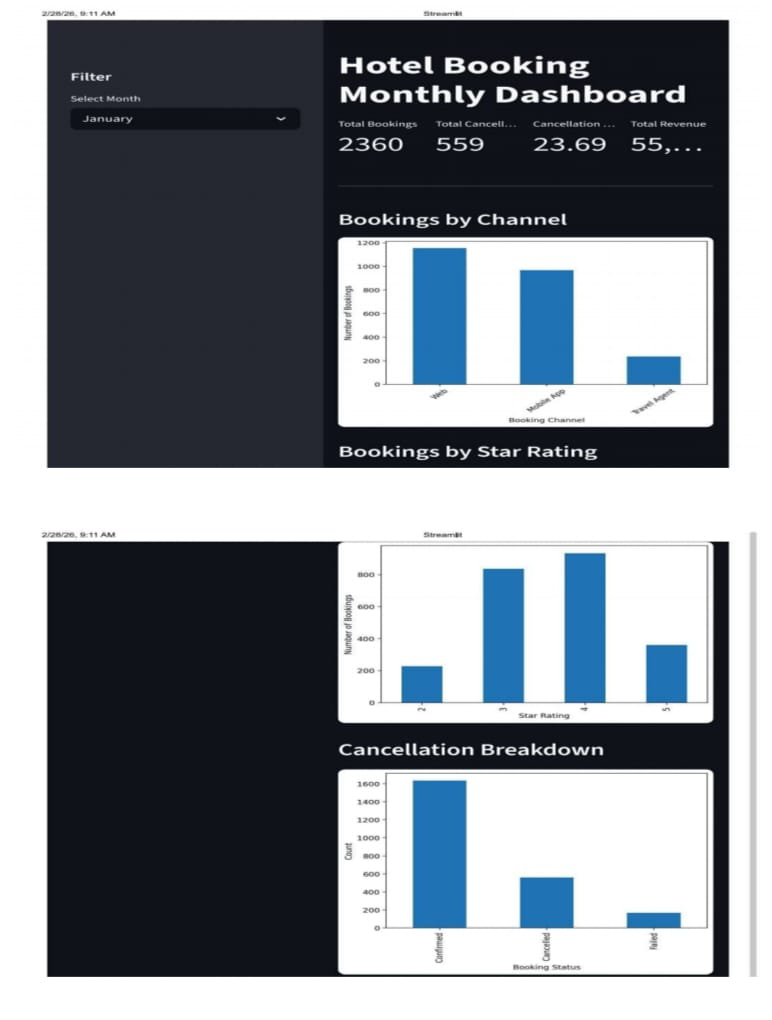

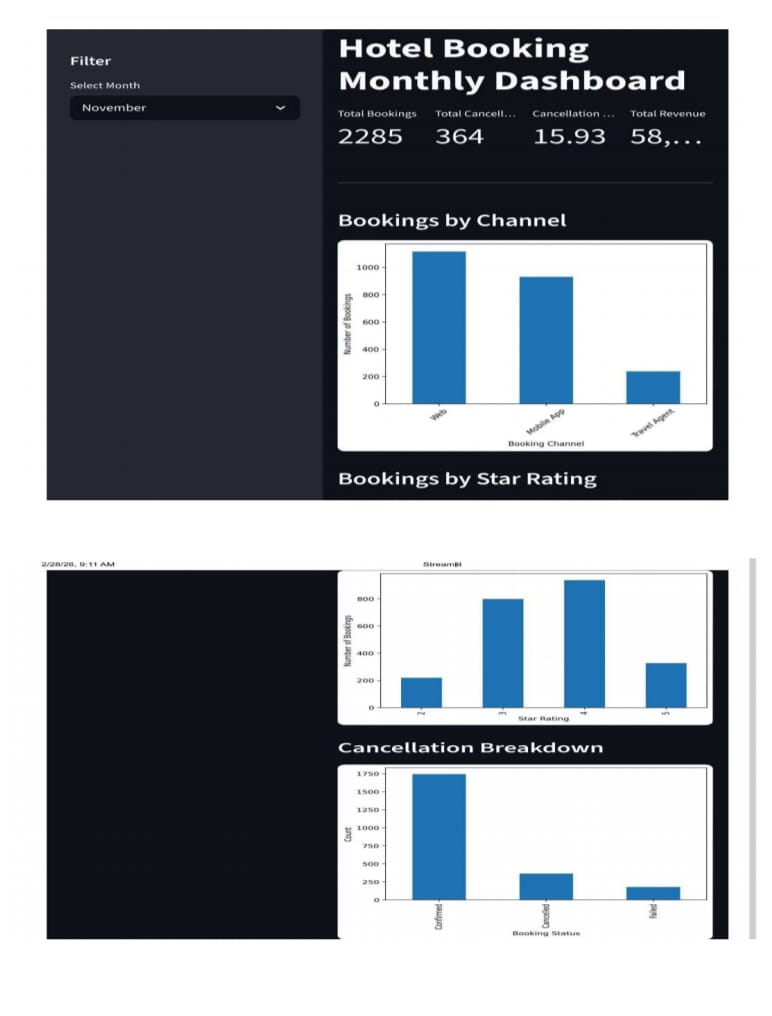

# 8. Root Cause Analysis

## **8.1 Why Are Cancellations High?**

The high cancellation rate appears to be linked to longer lead times and third-party booking channels. Customers who book well in advance often change travel plans or find better pricing options later. Additionally, OTA platforms typically offer flexible cancellation policies, encouraging customers to make tentative bookings without strong commitment. Price sensitivity and competitive comparison behavior also contribute to booking reversals.

## **8.2 Why Do Some Channels Perform Better?**

OTA channels generate higher booking volumes due to wider visibility, marketing reach, and customer convenience. However, direct channels may show lower cancellation rates and better revenue margins. Customers booking directly often have higher intent and trust in the platform, leading to more stable bookings. Premium properties also tend to perform better in direct channels where pricing transparency is stronger.

# **8.3 Seasonal Impact on Bookings**

Booking volume and revenue fluctuate across months, indicating strong seasonality. Peak travel periods such as holidays and vacation months drive higher booking values and occupancy. During off-peak months, shorter stays and discount-driven bookings are more common. This seasonal variation directly impacts pricing strategy, revenue stability, and cancellation patterns.

 Strong analytical code to justify

Chart 1 - Cancellation Rate by Lead Time (Check if longer lead time causes cancellations)

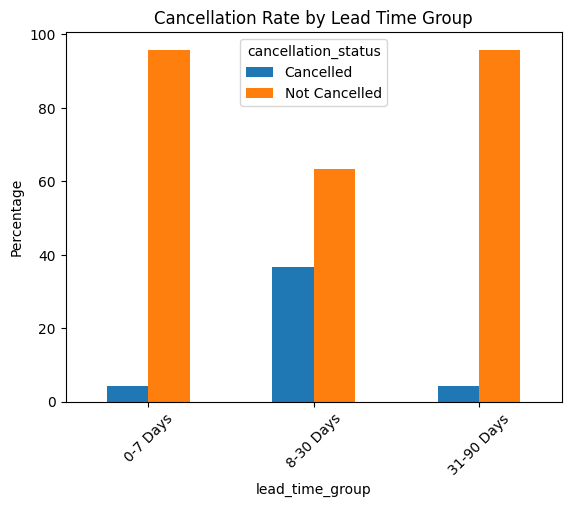

In [ ]:
# Create lead time groups
df['lead_time_group'] = pd.cut(df['lead_time'],
                               bins=[0, 7, 30, 90, 365],
                               labels=['0-7 Days', '8-30 Days', '31-90 Days', '90+ Days'])

# Cancellation rate by lead time group
lead_cancel = pd.crosstab(df['lead_time_group'], df['cancellation_status'], normalize='index') * 100
lead_cancel.plot(kind='bar')
plt.title('Cancellation Rate by Lead Time Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# 9. Business Recommendations

**9.1**. **Strategies to Reduce Cancellations**




*   Introduce partial non-refundable booking options with discounted pricing to encourage commitment.


*   Apply stricter cancellation policies for long lead-time bookings.


*   Send automated pre-stay reminders and confirmation emails to reduce last-minute cancellations.




*   Offer small incentives (loyalty points or discounts) for customers who retain their bookings.

These steps can reduce revenue leakage and improve occupancy stability.





**9.2**. **Pricing Optimization Ideas**


*   Implement dynamic pricing based on seasonality and demand fluctuations.
*   Offer early-bird discounts for short lead-time segments to reduce future cancellations.

*   Bundle room stays with add-on services (breakfast, airport transfer) to increase average booking value.
*   Adjust pricing strategy for OTA channels to offset commission impact.

Optimized pricing will improve revenue per booking without losing competitiveness.





**9.3.** **Channel Strategy Improvements**


*   Strengthen direct booking campaigns through website discounts or loyalty benefits.
*   Reduce dependency on high-cancellation OTA channels by negotiating better terms.

*   Identify high-performing channels during peak months and allocate more marketing budget there.
*   Track cancellation rate by channel regularly to optimize distribution mix.

A balanced channel strategy improves profitability and booking stability.





**9.4. Retention Strategies**

*   Launch a loyalty or reward program for repeat customers.
*   Provide personalized offers based on past booking behavior.

*   Offer discounts on extended stays to increase average stay length.
*   Collect customer feedback post-stay to improve service quality.

Retention improves long-term revenue and reduces acquisition costs.





# 10. Conclusion

This analysis of hotel booking data provided valuable insights into customer behavior, channel performance, cancellation trends, and seasonal demand patterns. The findings show that OTA channels drive high booking volume but also experience higher cancellation rates, while direct bookings tend to be more stable. Mid-range properties contribute significantly to overall bookings, and short stay durations dominate the dataset, indicating leisure and short business travel patterns.

Seasonal fluctuations clearly impact revenue and booking behavior, highlighting the need for dynamic pricing and demand-based strategies. High cancellation rates, particularly for long lead-time bookings, represent a key area of revenue risk.

By implementing targeted pricing strategies, improving channel mix, and strengthening customer retention initiatives, the platform can reduce cancellations, enhance profitability, and build stronger long-term customer relationships. Overall, data-driven decision-making can significantly improve operational efficiency and revenue performance in the competitive hotel booking market.